In [105]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [106]:
def read_csv(file_path):
    data = pd.read_csv(file_path)
    return data

In [ ]:
# read the csv file as a pandas dataframe
responses_path = 'data/responses.csv'
responses = read_csv(responses_path)
responses

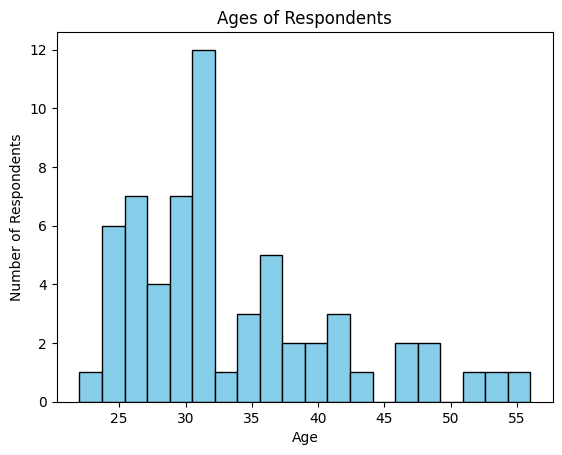

In [152]:
# viusalize the ages of the respondents
ages = responses['age']
plt.hist(ages, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Respondents')
plt.title('Ages of Respondents')
plt.savefig('figures/ages.pdf')
plt.show()

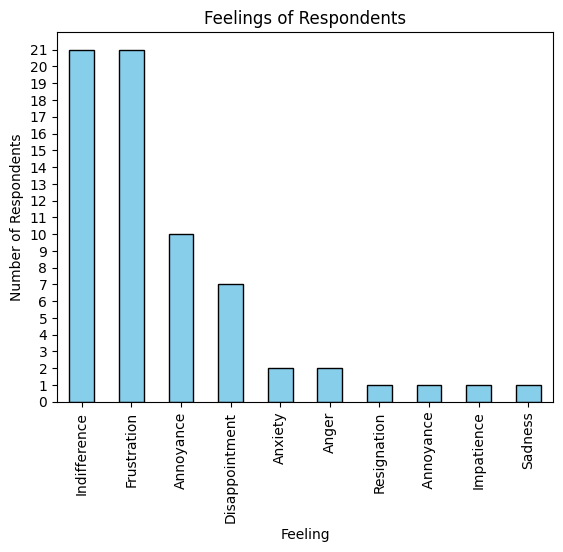

In [153]:
feelings = responses['feeling_normalized']
feelings = feelings.str.split(',').explode()
feelings_count = feelings.value_counts()

feelings_count.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Feeling')
plt.ylabel('Number of Respondents')
plt.title('Feelings of Respondents')

plt.yticks(range(0, feelings_count.max() + 1)) 
plt.savefig('figures/feelings.pdf')
plt.show()


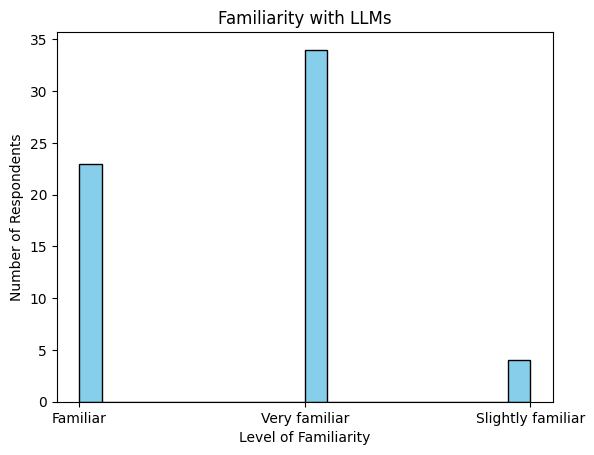

In [154]:
# visualize the domains of the respondents
familiarity = responses['familiarity']
familiarity = familiarity.str.split(':').str[0]
plt.hist(familiarity, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Level of Familiarity')
plt.ylabel('Number of Respondents')
plt.title('Familiarity with LLMs')
plt.savefig('figures/familiarity.pdf')
plt.show()


/var/folders/tc/3v26x7d972v9m3ppdncz976h0000gn/T/ipykernel_20723/1948869963.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  responses_mapped = responses[columns].replace(importance_mapping)


<Figure size 20000x700 with 0 Axes>

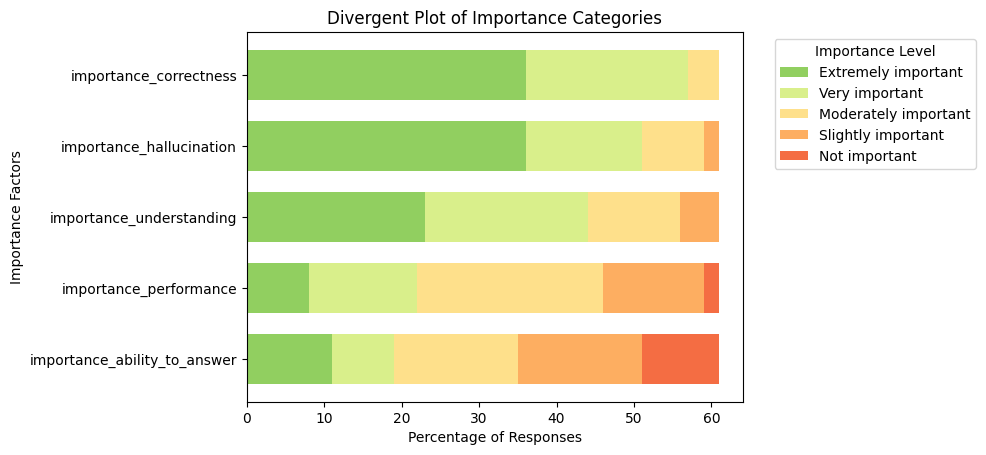

In [155]:
importance_mapping = {
    'Extremely important': 2,
    'Very important': 1,
    'Moderately important': 0,
    'Slightly important': -1,
    'Not important': -2
}

columns = [
    'importance_ability_to_answer',
    'importance_performance',
    'importance_understanding',
    'importance_hallucination',
    'importance_correctness'
]

responses_mapped = responses[columns].replace(importance_mapping)
counts = pd.DataFrame()

for column in columns:
    counts[column] = responses[column].value_counts().reindex(importance_mapping.keys(), fill_value=0)

counts = counts.reindex([
    'Extremely important', 'Very important', 'Moderately important',
    'Slightly important', 'Not important'
]).fillna(0)

plt.figure(figsize=(200, 7)) 
colors = ['#91cf60', '#d9ef8b', '#fee08b', '#fdae61', '#f46d43']

counts.T.plot(kind='barh', stacked=True, color=colors, width=0.7)

plt.title('Divergent Plot of Importance Categories')
plt.xlabel('Percentage of Responses')
plt.ylabel('Importance Factors')
plt.legend(title='Importance Level', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# save the plot
plt.savefig('figures/importance.pdf')
# Show the plot
plt.show()


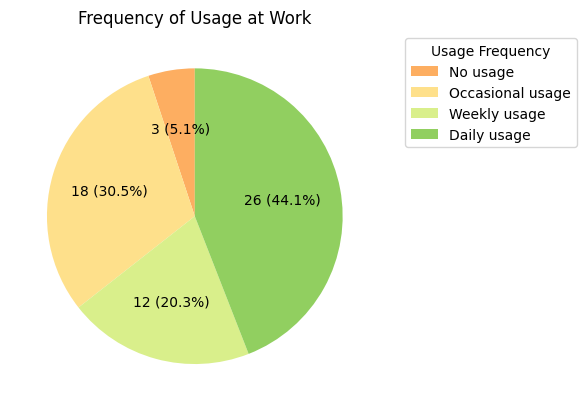

In [156]:
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))  # Calculate the count
        return f'{val} ({pct:.1f}%)'  # Format as "count (percentage)"
    return my_format


usage_mapping = {
    'I do not use it at all at work': 'No usage',
    'Occasionally (only when I\'m stuck on a task/problem)': 'Occasional usage',
    'On a weekly basis': 'Weekly usage',
    'On a daily basis': 'Daily usage'
}

usage = responses['usage_frequency']
usage = usage.replace(usage_mapping)
usage_count = usage.value_counts().reindex(usage_mapping.values(), fill_value=0)

colors = ['#fdae61', '#fee08b', '#d9ef8b', '#91cf60']

# display count as integer
usage_count.plot(kind='pie', labels=['']*len(usage_count), autopct=autopct_format(usage_count), colors=colors, startangle=90)

plt.legend(title='Usage Frequency', labels=usage_count.index, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Frequency of Usage at Work')
plt.ylabel('')
plt.savefig('figures/usage.pdf')
plt.show()


In [165]:
roles = responses['role_normalized']
roles = roles.str.split(',').explode()
roles_count = roles.value_counts()

roles_df = pd.DataFrame(roles_count)
roles_df.columns = ['Count']
roles_df.index.name = 'Role'
roles_df.reset_index(inplace=True)
roles_df



,Role,Count
0,PhD Student,15
1,Researcher,10
2,Software Developer,10
3,Software Engineer,6
4,Manager,5
5,Professor,5
6,AI Engineer,4
7,Tech Lead,2
8,Software Tester,1
9,Software Designer,1
